# Credit Card Segmentation using Kmeans

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv('C:/Users/Lenovo/Downloads/Python-DataScience-Aanalytixlabs/DSP Class 23-24 files/CC_GENERAL.csv')

In [3]:
credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
credit.isna().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [5]:
credit.MINIMUM_PAYMENTS.fillna(value=credit.MINIMUM_PAYMENTS.mean(),inplace=True)

In [6]:
credit.CREDIT_LIMIT.fillna(value=credit.CREDIT_LIMIT.mean(),inplace=True)

In [7]:
credit.isna().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [8]:
credit['monthly_avg_purchases']=credit.PURCHASES /credit.TENURE

In [9]:
credit['monthly_cash_advance']=credit.CASH_ADVANCE /credit.TENURE

In [10]:
credit[(credit.ONEOFF_PURCHASES == 0) & (credit.INSTALLMENTS_PURCHASES == 0)].shape[0]

2042

In [11]:
credit[(credit.ONEOFF_PURCHASES > 0) & (credit.INSTALLMENTS_PURCHASES > 0)].shape[0]

2774

In [12]:
credit[(credit.ONEOFF_PURCHASES > 0) & (credit.INSTALLMENTS_PURCHASES == 0)].shape[0]

1874

In [13]:
credit[(credit.ONEOFF_PURCHASES == 0) & (credit.INSTALLMENTS_PURCHASES > 0)].shape[0]

2260

In [14]:
def func(credit):
    if (credit.ONEOFF_PURCHASES == 0) & (credit.INSTALLMENTS_PURCHASES == 0):
        return 'none_one_ins'
    elif (credit.ONEOFF_PURCHASES > 0) & (credit.INSTALLMENTS_PURCHASES > 0):
        return 'both_one_ins'
    elif (credit.ONEOFF_PURCHASES > 0) & (credit.INSTALLMENTS_PURCHASES == 0):
        return 'one_off'
    else:
        return 'installment_withou_one'
     

In [15]:
credit['purchase_type']=credit.apply(func,axis=1)

In [16]:
credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchases,monthly_cash_advance,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment_withou_one
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none_one_ins
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,installment_withou_one
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,275.861322,864.206542,0.000000,6,50.000000,0.000000,installment_withou_one
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,0,5,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,installment_withou_one
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,none_one_ins


In [17]:
credit=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

In [18]:
credit.drop(['purchase_type','CUST_ID'],axis=1,inplace=True)

In [19]:
credit['limit_usage_ratatio']=credit.BALANCE /credit.CREDIT_LIMIT

In [20]:
credit['min_payment_ratio']= credit.PAYMENTS/credit.MINIMUM_PAYMENTS

In [21]:
credit

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchases,monthly_cash_advance,both_one_ins,installment_withou_one,none_one_ins,one_off,limit_usage_ratatio,min_payment_ratio
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,7.950000,0.000000,0,1,0,0,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,0.000000,536.912124,0,0,1,0,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,64.430833,0.000000,0,0,0,1,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,124.916667,17.149001,0,0,0,1,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,1.333333,0.000000,0,0,0,1,0.681429,2.771075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.500000,6,48.520000,0.000000,0,1,0,0,0.028494,6.660231
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.000000,6,50.000000,0.000000,0,1,0,0,0.019183,0.319208
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.250000,6,24.066667,0.000000,0,1,0,0,0.023399,0.986076
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.250000,6,0.000000,6.093130,0,0,1,0,0.026915,0.942505


In [79]:
cr_log=credit[credit.columns.difference(['both_one_ins','installment_withou_one','none_one_ins','one_off'])].applymap(lambda x : np.log(x +1)).copy()

In [81]:
cr_log

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,...,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE,limit_usage_ratatio,min_payment_ratio,monthly_avg_purchases,monthly_cash_advance
0,3.735304,0.597837,0.000000,0.000000,0.000000,6.908755,4.568506,4.945277,0.000000,0.000000,...,0.000000,4.568506,0.154151,0.080042,1.098612,2.564949,0.040086,0.894662,2.191654,0.000000
1,8.071989,0.646627,8.770896,0.223144,1.609438,8.853808,0.000000,6.978531,0.000000,0.000000,...,0.200671,0.000000,0.000000,0.000000,0.000000,2.564949,0.376719,1.574068,0.000000,6.287695
2,7.822504,0.693147,0.000000,0.000000,0.000000,8.922792,0.000000,6.442994,6.651791,0.693147,...,0.000000,6.651791,0.693147,0.000000,2.564949,2.564949,0.287197,0.688979,4.180994,0.000000
3,7.419183,0.492477,5.331694,0.080042,0.693147,8.922792,0.000000,6.762968,7.313220,0.080042,...,0.000000,7.313220,0.080042,0.000000,0.693147,2.564949,0.200671,0.000000,4.835620,2.898616
4,6.707735,0.693147,0.000000,0.000000,0.000000,7.090910,0.000000,5.504483,2.833213,0.080042,...,0.000000,2.833213,0.080042,0.000000,0.693147,2.564949,0.519644,1.327360,0.847298,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,0.693147,0.000000,0.000000,0.000000,6.908755,5.677165,3.909748,0.000000,0.000000,...,0.405465,5.677165,0.693147,0.606136,1.945910,1.945910,0.028095,2.036042,3.902377,0.000000
8946,3.004851,0.693147,0.000000,0.000000,0.000000,6.908755,5.707110,6.762968,0.000000,0.000000,...,0.000000,5.707110,0.693147,0.606136,1.945910,1.945910,0.019002,0.277031,3.931826,0.000000
8947,3.194529,0.606136,0.000000,0.000000,0.000000,6.908755,4.979489,4.423869,0.000000,0.000000,...,0.223144,4.979489,0.606136,0.510826,1.791759,1.945910,0.023129,0.686161,3.221539,0.000000
8948,2.671218,0.606136,3.625907,0.154151,1.098612,6.216606,0.000000,4.038755,0.000000,0.000000,...,0.223144,0.000000,0.000000,0.000000,0.000000,1.945910,0.026559,0.663978,0.000000,1.959127


In [83]:
cr_log=pd.concat([cr_log ,credit.loc[:,['both_one_ins','installment_withou_one','none_one_ins','one_off']]],axis=1)

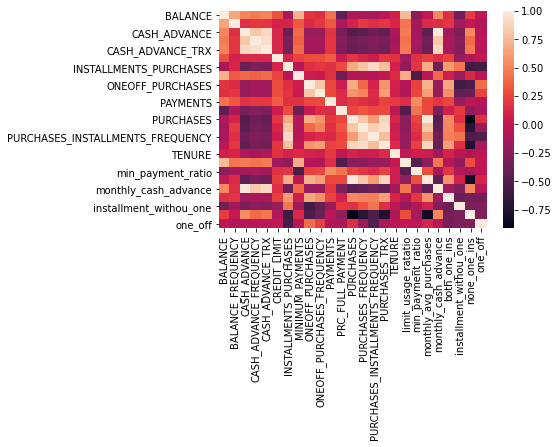

In [84]:
import seaborn as sns 
sns.heatmap(cr_log.corr())

In [23]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc=StandardScaler()
cr_scaled=sc.fit_transform(cr_log)

In [86]:
cr_scaled

array([[-1.20521818, -0.14875746, -0.93073294, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.94891762,  0.17961568,  1.52878819, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.82499258,  0.49271003, -0.93073294, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-1.4738341 , -0.09290575, -0.93073294, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-1.73377525, -0.09290575,  0.08603831, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.11830096, -0.73437135,  0.42995349, ..., -0.58122082,
        -0.54369045,  1.94316249]])

# Applying PCA

In [87]:
from sklearn.decomposition import PCA

In [88]:
var_ratio={}
for i in range(2,26):
    pc=PCA(n_components = i)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[i]=sum(cr_pca.explained_variance_ratio_)

In [89]:
var_ratio

{2: 0.5285032469306609,
 3: 0.636885922205627,
 4: 0.7208236615633933,
 5: 0.7751698120243122,
 6: 0.8235139586689121,
 7: 0.8642619839435957,
 8: 0.8952185517489375,
 9: 0.9205977691021563,
 10: 0.9412777193271273,
 11: 0.9561258246224533,
 12: 0.9661150698087927,
 13: 0.9747037127009305,
 14: 0.9815021181321357,
 15: 0.9867633329816737,
 16: 0.9903073086740675,
 17: 0.992973570012939,
 18: 0.994882499038601,
 19: 0.9966224479739915,
 20: 0.9983368810579597,
 21: 0.9994603617928873,
 22: 0.9997215195039324,
 23: 0.9999666293820364,
 24: 0.9999999999999999,
 25: 0.9999999999999999}

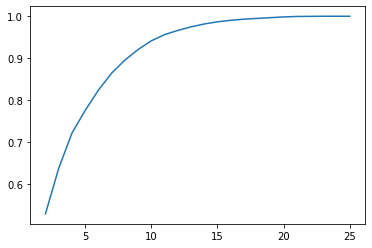

In [90]:
pd.Series(var_ratio).plot()

In [91]:
pc_final=PCA(n_components = 9).fit(cr_scaled)

In [92]:
pc_final

PCA(n_components=9)

In [93]:
pc_final.explained_variance_

array([8.48698511, 4.72707249, 2.70986966, 2.09867797, 1.35880558,
       1.20873872, 1.01881447, 0.77400068, 0.63455133])

In [94]:
pc_final.explained_variance_.sum()

23.01751601707255

In [95]:
cr_reduced=pc_final.fit_transform(cr_scaled)

In [96]:
dd=pd.DataFrame(cr_reduced)

In [97]:
dd

,0,1,2,3,4,5,6,7,8
0,0.225606,-3.361888,-0.859278,-0.881257,-0.152581,-0.235840,0.073323,0.793763,0.127862
1,-4.497135,0.740006,-0.162801,1.736986,-1.306137,-0.508172,-0.312046,-0.748732,-0.084370
2,1.440968,1.141236,2.735377,-2.283795,-0.390269,-0.947020,-0.124069,-1.129244,-0.471080
3,-1.072342,-0.443385,2.215807,-3.031340,1.798279,0.115346,-2.499140,-0.565960,-1.175867
4,-1.255497,-1.356607,1.795194,-2.003665,-1.103167,-0.717548,1.414714,0.613457,0.343376
...,...,...,...,...,...,...,...,...,...
8945,2.281242,-3.350852,-1.637311,0.888633,2.629677,0.637509,3.085441,-2.112704,0.840492
8946,1.551327,-2.505018,-2.399246,-1.415214,2.740167,0.935566,1.717320,-2.255900,1.364902
8947,1.462775,-3.696080,-1.692651,-0.471294,2.980649,1.279952,2.046741,-2.127638,0.766658
8948,-3.242988,-3.967156,0.373441,0.584977,2.185475,3.099068,2.548628,-1.672025,-0.119279


In [100]:
pd.DataFrame(pc_final.explained_variance_ratio_ ,index =[' PC _' + str(i) for i in range(0,9)])

,0
PC _0,0.339441
PC _1,0.189062
PC _2,0.108383
PC _3,0.083938
PC _4,0.054346
PC _5,0.048344
PC _6,0.040748
PC _7,0.030957
PC _8,0.025379


# Clustering

In [57]:
from sklearn.cluster import KMeans

In [ ]:
KMeans()

In [101]:
cr_reduced

array([[ 0.22560637, -3.36188787, -0.85927766, ...,  0.07332301,
         0.79376292,  0.12786188],
       [-4.49713513,  0.74000558, -0.16280114, ..., -0.31204601,
        -0.74873184, -0.08437045],
       [ 1.44096751,  1.14123583,  2.73537733, ..., -0.1240695 ,
        -1.12924449, -0.4710799 ],
       ...,
       [ 1.46277522, -3.69608013, -1.69265077, ...,  2.04674092,
        -2.1276383 ,  0.76665849],
       [-3.24298833, -3.96715643,  0.37344056, ...,  2.54862753,
        -1.67202485, -0.11927909],
       [ 0.05492422,  0.0572436 ,  2.50289586, ...,  1.87956579,
        -1.24027567,  0.4352478 ]])

## Cluster error technique for finding  n_clusters


In [103]:

errors=[]
for i in range(1,21):
    clusters=KMeans(i)
    clusters.fit(cr_reduced)
    errors.append(clusters.inertia_)

In [105]:
errors

[205983.75083683545,
 147366.6929756694,
 121479.94911711775,
 100539.66739824996,
 87940.97434565716,
 81192.09801877297,
 75124.21595244326,
 70578.12122580432,
 66612.92183013086,
 63409.29721811834,
 60676.92034516758,
 58303.10207028883,
 56178.679043276396,
 53775.26972115531,
 52228.16973646581,
 49793.21887008362,
 48524.30021303038,
 46067.559095376535,
 45621.79027862876,
 44317.33084902092]

In [106]:
cluster_df =pd.DataFrame({'Cluster_no':np.arange(1,21),'Cluster_errors': errors})

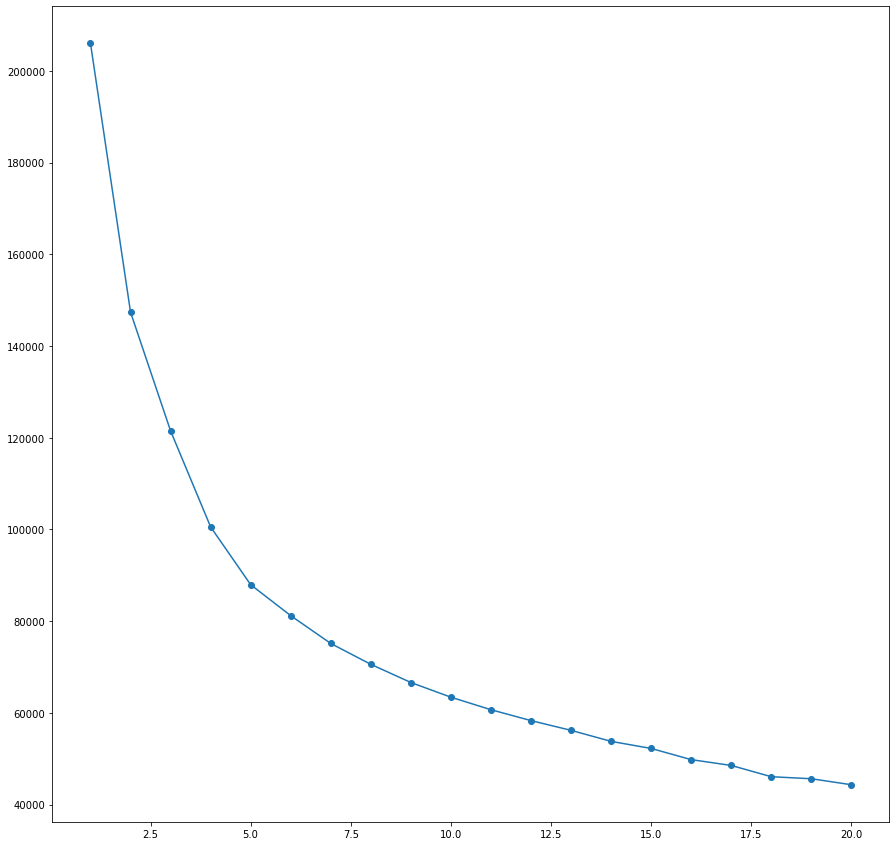

In [133]:
plt.figure(figsize=(15,15))
plt.plot(cluster_df.Cluster_no,cluster_df.Cluster_errors,marker='o')

## Silhouette technique for finding n_clusters

In [114]:
import sklearn

In [116]:
score=[]
for i in range(2,21):
    km=KMeans(i)
    km.fit(cr_reduced)
    score.append(sklearn.metrics.silhouette_score(cr_reduced,km.labels_))

In [117]:
score


[0.2852553628512301,
 0.26356830661452607,
 0.31255117545862254,
 0.3109619953387744,
 0.30620015396936184,
 0.3066823186186726,
 0.29056775769792287,
 0.2920639749471146,
 0.27121687286508134,
 0.26554774193510355,
 0.26102097372247,
 0.27035737787437464,
 0.25402341996301664,
 0.24572498998329007,
 0.2438707089756043,
 0.26947913986158767,
 0.24351689945507127,
 0.2528773061014423,
 0.25286635735331753]

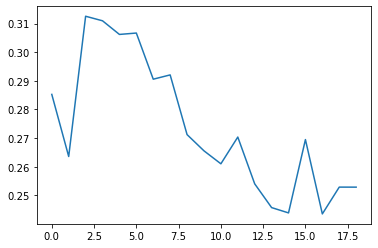

In [120]:
pd.Series(score).plot()

In [121]:
km=KMeans(n_clusters=4,random_state=123)

In [123]:
km.fit(cr_reduced)

KMeans(n_clusters=4, random_state=123)

In [124]:
km.labels_

array([1, 2, 3, ..., 1, 2, 3])

In [128]:
pd.Series(km.labels_).value_counts()

0    2715
1    2225
2    2151
3    1859
dtype: int64

In [130]:
credit['clusters']=pd.Series(km.labels_)

In [131]:
credit

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,monthly_avg_purchases,monthly_cash_advance,both_one_ins,installment_withou_one,none_one_ins,one_off,limit_usage_ratatio,min_payment_ratio,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,12,7.950000,0.000000,0,1,0,0,0.040901,1.446508,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,12,0.000000,536.912124,0,0,1,0,0.457495,3.826241,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,64.430833,0.000000,0,0,0,1,0.332687,0.991682,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,12,124.916667,17.149001,0,0,0,1,0.222223,0.000000,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,12,1.333333,0.000000,0,0,0,1,0.681429,2.771075,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,48.520000,0.000000,0,1,0,0,0.028494,6.660231,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,50.000000,0.000000,0,1,0,0,0.019183,0.319208,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,6,24.066667,0.000000,0,1,0,0,0.023399,0.986076,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,6,0.000000,6.093130,0,0,1,0,0.026915,0.942505,2


In [183]:
credit.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'monthly_avg_purchases', 'monthly_cash_advance',
       'both_one_ins', 'installment_withou_one', 'none_one_ins', 'one_off',
       'limit_usage_ratatio', 'min_payment_ratio', 'clusters'],
      dtype='object')

In [184]:
col_kpi=['BALANCE','PURCHASES','monthly_avg_purchases','monthly_cash_advance','limit_usage_ratatio','min_payment_ratio']

In [185]:
cluster_df_4=pd.concat([credit[col_kpi],pd.Series(km.labels_,name='Clusters')],axis=1)

In [209]:
cluster_4=cluster_df_4.groupby('Clusters').apply(lambda x: x[col_kpi].mean())
cluster_4


,BALANCE,PURCHASES,monthly_avg_purchases,monthly_cash_advance,limit_usage_ratatio,min_payment_ratio
Clusters,,,,,,
0.0,1900.065835,2330.891436,197.960939,72.629989,0.365345,7.361299
1.0,627.258999,532.179771,46.643789,21.297819,0.243291,13.387034
2.0,2242.790392,5.905235,0.518158,190.703216,0.579175,9.714633
3.0,1411.230532,781.877816,69.342043,76.155067,0.377336,5.489526


<Figure size 7200x7200 with 0 Axes>

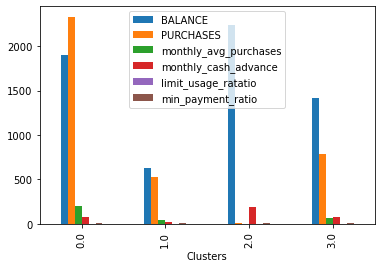

In [210]:
%matplotlib inline
plt.figure(figsize=(100,100))
cluster_4.plot(kind='bar')
plt.legend()